In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("weather_2020.csv")

/tmp/ipykernel_77736/1781249400.py:1: DtypeWarning: Columns (15,16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("weather_2020.csv")


In [3]:
df.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,24.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,16.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1026119, 23)

In [5]:
list(df)

['STATION',
 'Country/Region',
 'DATE',
 'Year',
 'Month',
 'Day',
 'PRCP',
 'SNWD',
 'TAVG',
 'TMAX',
 'TMIN',
 'SNOW',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'PRCP_ATTRIBUTES',
 'TAVG_ATTRIBUTES',
 'TMAX_ATTRIBUTES',
 'TMIN_ATTRIBUTES',
 'DAPR',
 'MDPR',
 'WESD',
 'SNWD_ATTRIBUTES']

In [6]:
df.rename(columns={"Country/Region":'COUNTRY'}, inplace=True)

In [7]:
df.head()

,STATION,COUNTRY,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,24.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,16.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cols_interest = ["COUNTRY", "DATE"]

print(pd.Series({col: df[col].unique() for col in cols_interest }))

COUNTRY                                                                                                                                                                          [Comoros, Georgia, Nepal, Philippines, Monaco, US, Australia, Namibia, Saint Lucia, Lebanon, Zambia, Malaysia, Peru, Kenya, Belarus, Iceland, Lesotho, Venezuela, Albania, Tanzania, Greece, Barbados, Singapore, Switzerland, Sri Lanka, China, Gabon, Guinea-Bissau, Congo (Brazzaville), United Arab Emirates, Tajikistan, Syria, Lithuania, Paraguay, Romania, Maldives, Jamaica, Kuwait, Finland, Argentina, Ethiopia, Japan, Cameroon, Bhutan, Botswana, Pakistan, Brazil, Madagascar, Eritrea, Liberia, Mali, Thailand, Egypt, Ireland, Belgium, Luxembourg, Fiji, Italy, Greenland, Antigua and Barbuda, Saint Vincent and the Grenadines, Andorra, Guinea, Nigeria, Ecuador, Guatemala, Afghanistan, Suriname, Djibouti, Uganda, Niger, Israel, Russia, Chile, Mexico, Seychelles, Bosnia and Herzegovina, Montenegro, Trinidad and Tobago, To

In [9]:
df["DATE"].nunique()

188

In [10]:
df = df.query("COUNTRY == 'Mexico' or COUNTRY == 'United Kingdom'")

In [11]:
df.shape

(27777, 23)

In [12]:
df.dtypes

STATION             object
COUNTRY             object
DATE                object
Year                 int64
Month                int64
Day                  int64
PRCP               float64
SNWD               float64
TAVG               float64
TMAX               float64
TMIN               float64
SNOW               float64
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
PRCP_ATTRIBUTES     object
TAVG_ATTRIBUTES     object
TMAX_ATTRIBUTES     object
TMIN_ATTRIBUTES     object
DAPR               float64
MDPR               float64
WESD               float64
SNWD_ATTRIBUTES     object
dtype: object

In [13]:
from datetime import datetime
df.loc[:, 'FDATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [14]:
df.dtypes

STATION                    object
COUNTRY                    object
DATE                       object
Year                        int64
Month                       int64
Day                         int64
PRCP                      float64
SNWD                      float64
TAVG                      float64
TMAX                      float64
TMIN                      float64
SNOW                      float64
LATITUDE                  float64
LONGITUDE                 float64
ELEVATION                 float64
PRCP_ATTRIBUTES            object
TAVG_ATTRIBUTES            object
TMAX_ATTRIBUTES            object
TMIN_ATTRIBUTES            object
DAPR                      float64
MDPR                      float64
WESD                      float64
SNWD_ATTRIBUTES            object
FDATE              datetime64[ns]
dtype: object

In [15]:
df.query("STATION=='MXM00076680'").shape

(123, 24)

In [16]:
df.query("STATION=='UKE00105657'").shape

(188, 24)

In [17]:
'''
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

np.random.seed(1)

N = 100
y = np.random.rand(N)

now = dt.datetime.now()
then = now + dt.timedelta(days=100)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(days,y)
plt.gcf().autofmt_xdate()
plt.show()
########################

import datetime as dt

dates = ['01/02/1991','01/03/1991','01/04/1991']
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
y = range(len(x)) # many thanks to Kyss Tao for setting me straight here

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.gcf().autofmt_xdate()
'''

"\nimport matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\nimport numpy as np\nimport datetime as dt\n\nnp.random.seed(1)\n\nN = 100\ny = np.random.rand(N)\n\nnow = dt.datetime.now()\nthen = now + dt.timedelta(days=100)\ndays = mdates.drange(now,then,dt.timedelta(days=1))\n\nplt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))\nplt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))\nplt.plot(days,y)\nplt.gcf().autofmt_xdate()\nplt.show()\n########################\n\nimport datetime as dt\n\ndates = ['01/02/1991','01/03/1991','01/04/1991']\nx = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]\ny = range(len(x)) # many thanks to Kyss Tao for setting me straight here\n\nimport matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\n\nplt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))\nplt.gca().xaxis.set_major_locator(mdates.DayLocator())\nplt.plot(x,y)\nplt.gcf().autofmt_xdate()\n"

Text(0, 0.5, 'Precipitación')

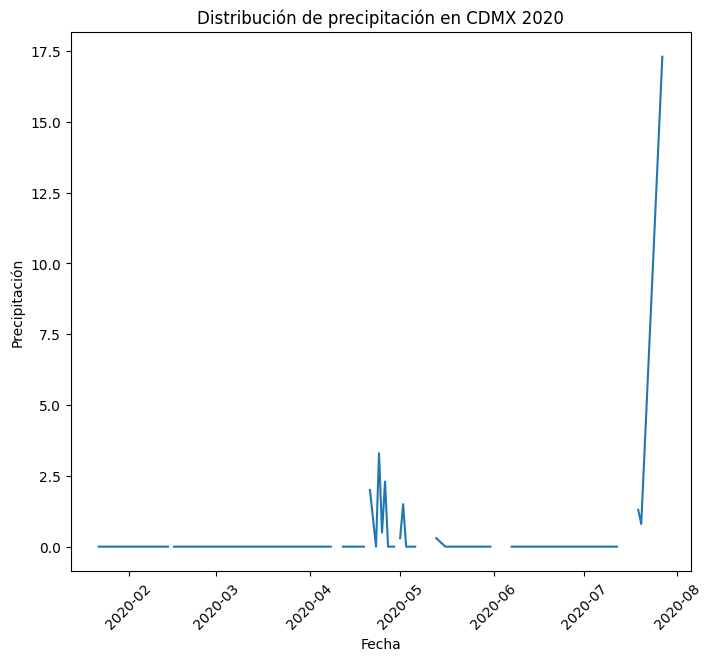

In [40]:
#df.query("COUNTRY=='Mexico'").plot(x="DATE", y="PRCP")
plt.xticks(rotation=45, )
plt.rcParams['figure.figsize'] = [9,7]
#plt.locator_params(axis="y", nbins=10)
plt.plot(df.query("STATION=='MXM00076680'")["FDATE"],
        df.query("STATION=='MXM00076680'")["PRCP"])
plt.title("Distribución de precipitación en CDMX 2020")
plt.xlabel("Fecha")
plt.ylabel("Precipitación")

Text(0, 0.5, 'Precipitación')

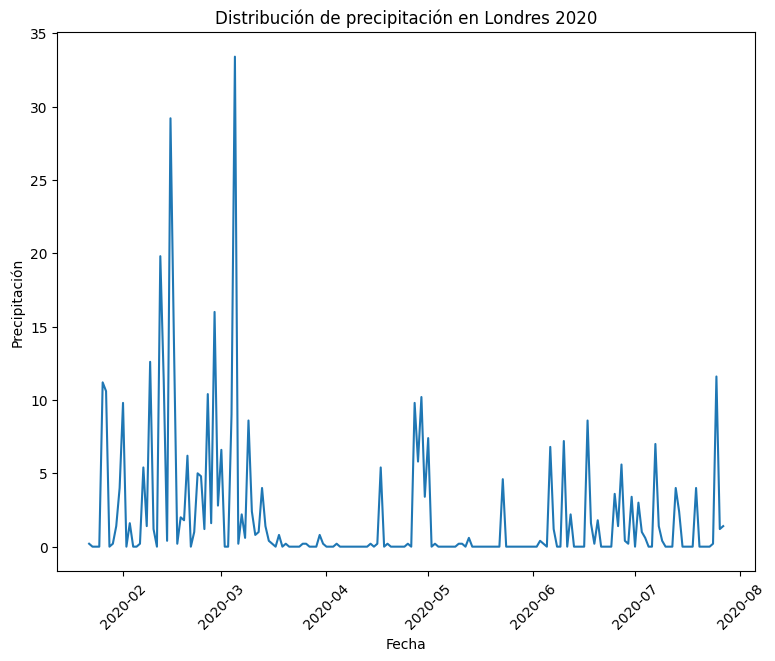

In [41]:
plt.xticks(rotation=45, )
plt.rcParams['figure.figsize'] = [4,8]
#plt.locator_params(axis="y", nbins=10)
plt.plot(df.query("STATION=='UKE00105657'")["FDATE"],
        df.query("STATION=='UKE00105657'")["PRCP"])
plt.title("Distribución de precipitación en Londres 2020")
plt.xlabel("Fecha")
plt.ylabel("Precipitación")

In [20]:
df.head()

,STATION,COUNTRY,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES,FDATE
411771,MXM00076382,Mexico,2020-01-22,2020,1,22,0.0,NaN,17.3,27.5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
411772,MXM00076382,Mexico,2020-01-23,2020,1,23,0.0,NaN,17.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-23
411773,MXM00076382,Mexico,2020-01-24,2020,1,24,0.0,NaN,17.8,25.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24
411774,MXM00076382,Mexico,2020-01-25,2020,1,25,0.0,NaN,18.0,26.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-25
411775,MXM00076382,Mexico,2020-01-26,2020,1,26,0.0,NaN,17.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-26


In [21]:
print("Min")
print(df.query("STATION=='MXM00076680'")["PRCP"].min())
print("Max")
print(df.query("STATION=='MXM00076680'")["PRCP"].max())
print("Promedio")
print(df.query("STATION=='MXM00076680'")["PRCP"].mean())
print("Varianza")
print(df.query("STATION=='MXM00076680'")["PRCP"].var())
print("Desv Est")
print(df.query("STATION=='MXM00076680'")["PRCP"].std())

Min
0.0
Max
17.3
Promedio
0.26842105263157895
Varianza
2.807666511411272
Desv Est
1.6756092955731872


In [22]:
print("Min")
print(df.query("STATION=='UKE00105657'")["PRCP"].min())
print("Max")
print(df.query("STATION=='UKE00105657'")["PRCP"].max())
print("Promedio")
print(df.query("STATION=='UKE00105657'")["PRCP"].mean())
print("Varianza")
print(df.query("STATION=='UKE00105657'")["PRCP"].var())
print("Desv Est")
print(df.query("STATION=='UKE00105657'")["PRCP"].std())

Min
0.0
Max
33.4
Promedio
2.08936170212766
Varianza
21.11924451018318
Desv Est
4.595567920310087


In [23]:
# Nuestra muestra son los datos de la estación de México
mx_sample_data = df \
    .query("STATION=='MXM00076680'")["PRCP"] \
    .dropna() \
    .to_numpy()

# Cantidad de submuestras a generar
num_samples = 1000  

# Lista para guardar los promedios generados (u otro estimador)
mx_bootstrap_means = []

# Realizar remuestreo
for _ in range(num_samples):
    # Generamos submuestra con reemplazo
    bootstrap_sample = np.random.choice(
        mx_sample_data, 
        size=len(mx_sample_data), 
        replace=True)
    # Calculamos el estimador puntual de interés y lo guardamos
    mx_bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the confidence interval (using percentiles)
mx_confidence_interval = np.percentile(mx_bootstrap_means, [2.5, 97.5])


In [29]:
print(mx_bootstrap_means)

[0.13859649122807016, 0.45964912280701753, 0.11578947368421053, 0.19561403508771932, 0.2219298245614035, 0.08157894736842106, 0.4026315789473684, 0.287719298245614, 0.07894736842105263, 0.35526315789473684, 0.21578947368421053, 0.2710526315789474, 0.12894736842105262, 0.0719298245614035, 0.4298245614035088, 0.34912280701754383, 0.4657894736842105, 0.2543859649122807, 0.27280701754385966, 0.20877192982456144, 0.4219298245614036, 0.6947368421052632, 0.08771929824561403, 0.3131578947368421, 0.29912280701754385, 0.32807017543859646, 0.5061403508771929, 0.26228070175438595, 0.5649122807017544, 0.09385964912280703, 0.20087719298245615, 0.41842105263157897, 0.36666666666666664, 0.09210526315789473, 0.12807017543859647, 0.42543859649122806, 0.1307017543859649, 0.28859649122807024, 0.7175438596491229, 0.2631578947368421, 0.25877192982456143, 0.29385964912280704, 0.16052631578947366, 0.3956140350877193, 0.3333333333333333, 0.09473684210526315, 0.44824561403508767, 0.10175438596491226, 0.14736842

In [30]:
mx_confidence_interval

array([0.06138158, 0.5904386 ])

In [31]:
import numpy as np

# Given sample data
ln_sample_data = df \
    .query("STATION=='UKE00105657'")["PRCP"] \
    .to_numpy()

# Number of bootstrap samples
num_samples = 1000  # You can adjust the number of bootstrap samples as needed

# Empty list to store bootstrap sample means
ln_bootstrap_means = []

# Performing bootstrapping
for _ in range(num_samples):
    # Generate bootstrap sample by resampling with replacement
    bootstrap_sample = np.random.choice(
        ln_sample_data, 
        size=len(ln_sample_data), 
        replace=True)
    # Calculate the mean of the bootstrap sample and store it
    ln_bootstrap_means.append(np.mean(bootstrap_sample))
    
# Calculate the confidence interval (using percentiles)
ln_confidence_interval = np.percentile(ln_bootstrap_means, [2.5, 97.5])

In [32]:
ln_confidence_interval

array([1.49135638, 2.7618617 ])

In [44]:
ln_bootstrap_means

[1.9744680851063832,
 2.18936170212766,
 2.245744680851064,
 1.6255319148936171,
 2.112765957446808,
 2.0180851063829786,
 2.2021276595744683,
 2.3553191489361702,
 2.3638297872340424,
 2.9627659574468086,
 1.9500000000000002,
 2.2319148936170214,
 2.202127659574468,
 1.797872340425532,
 2.442553191489362,
 1.3595744680851063,
 2.548936170212766,
 2.3925531914893616,
 2.282978723404255,
 2.393617021276596,
 2.622340425531915,
 1.795744680851064,
 1.3670212765957446,
 1.8808510638297868,
 2.125531914893617,
 2.7382978723404254,
 1.4563829787234044,
 1.602127659574468,
 2.302127659574468,
 2.780851063829787,
 1.4702127659574467,
 1.8617021276595744,
 2.05,
 2.4595744680851066,
 2.3372340425531917,
 1.7382978723404257,
 2.540425531914894,
 2.0074468085106383,
 2.1659574468085108,
 2.1446808510638298,
 2.526595744680851,
 2.1957446808510634,
 2.474468085106383,
 2.2414893617021274,
 2.1712765957446805,
 1.536170212765957,
 2.393617021276596,
 2.4223404255319148,
 2.2393617021276597,
 1.702

(0.0, 150.0)

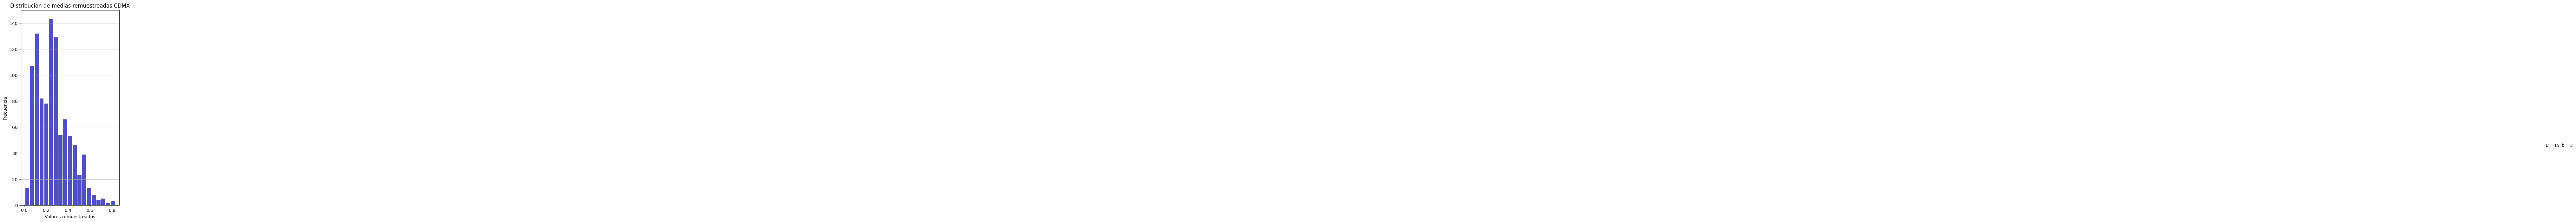

In [42]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=mx_bootstrap_means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.rcParams['figure.figsize'] = [4,8]
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valores remuestreados')
plt.ylabel('Frecuencia')
plt.title('Distribución de medias remuestreadas CDMX')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


(0.0, 110.0)

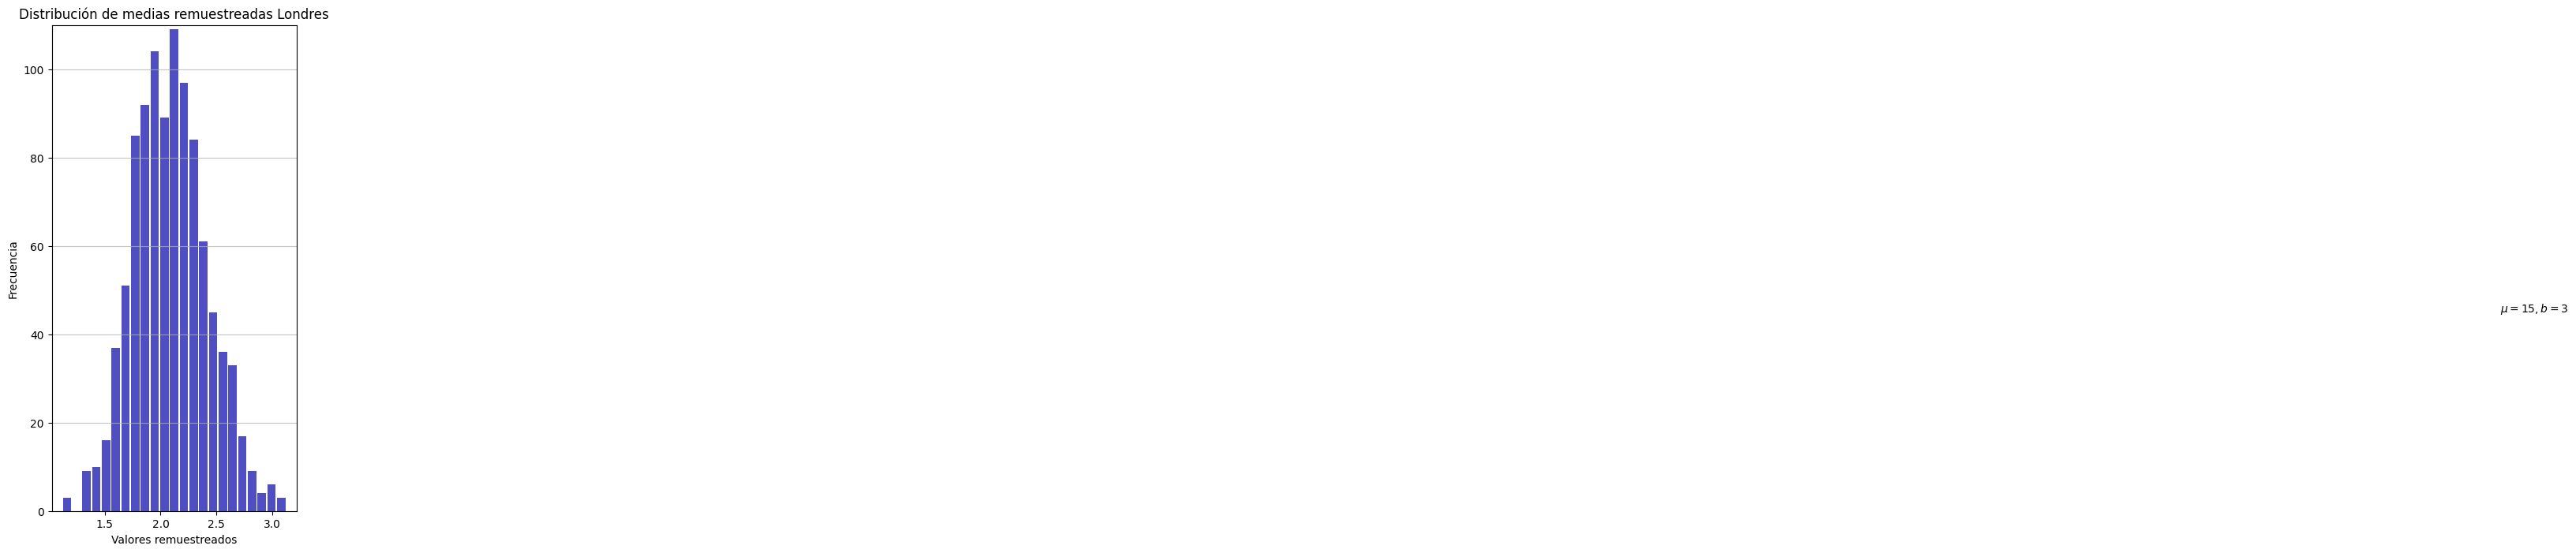

In [43]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=ln_bootstrap_means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.rcParams['figure.figsize'] = [4,8]
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valores remuestreados')
plt.ylabel('Frecuencia')
plt.title('Distribución de medias remuestreadas Londres')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
